In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.tree import DecisionTreeClassifier

In [17]:
df= pd.read_csv('train.csv')
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [18]:
df_test= pd.read_csv('test.csv')
df_test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [19]:
print(' Shape of Train set ', df.shape, '\n', 'Shape of Test set',df_test.shape )

 Shape of Train set  (8693, 14) 
 Shape of Test set (4277, 13)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [21]:
df.drop(['Cabin','Name','PassengerId'], axis=1, inplace=True)

In [22]:
df.replace({True:1, False:0}, inplace=True)

In [23]:
df.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8476.000000,8514.000000,8490.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,0.358306,28.827930,0.023439,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624
std,0.479531,14.489021,0.151303,666.717663,1611.489240,604.696458,1136.705535,1145.717189,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,38.000000,0.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.000000
max,1.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [24]:
df.isna().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [25]:
def fill_missing_values(df, columns, method='mode'):
    for col in columns:
        if method == 'mode':
            df[col] = df[col].fillna(df[col].mode()[0])
        elif method == 'mean':
            df[col] = df[col].fillna(df[col].mean())

In [26]:
# HomePlanet CryoSleep Destination  VIP use mode to replace null
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Age RoomService FoodCourt ShoppingMall Spa VRDeck use mean to replace null
numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


fill_missing_values(df, categorical_cols, method='mode')
fill_missing_values(df, numeric_cols, method='mean')


df.dropna(inplace=True)

In [27]:
df.shape

(8693, 11)

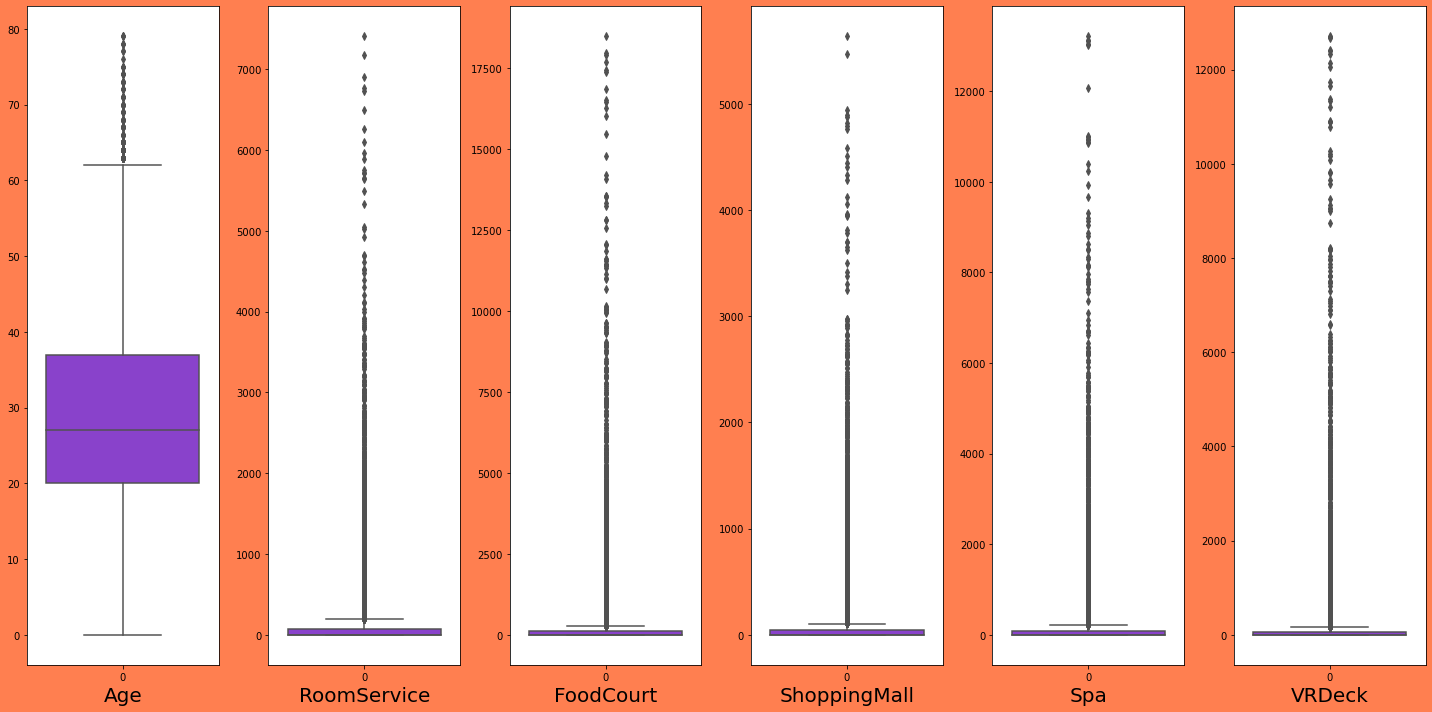

In [42]:
df_cont= df[['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

plt.figure(figsize=(20,10), facecolor='Coral')
plotnumber =1

for column in df_cont:
    if plotnumber<=6:
        ax=plt.subplot(1,6,plotnumber)
        sns.boxplot(df_cont[column], color='blueviolet')
        plt.xlabel(column, fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()
plt.show()

In [29]:
def remove_outliers(df, columns, method='iqr', lower=0.01, upper=0.99):
    if method == 'iqr':
        Q1 = df[columns].quantile(lower)
        Q3 = df[columns].quantile(upper)
        IQR = Q3 - Q1
        lower_bound = (Q1 - 1.5 * IQR)
        upper_bound = (Q3 + 1.5 * IQR)
    elif method == 'std':
        mean = df[columns].mean()
        std = df[columns].std()
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
    else:
        raise ValueError('Method not recognized')

    for col in columns:
        df = df[(df[col] >= lower_bound[col]) & (df[col] <= upper_bound[col])]

    return df

# Example usage:
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
#df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
#df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df = remove_outliers(df, numeric_cols, method='iqr', lower=0.01, upper=0.99)


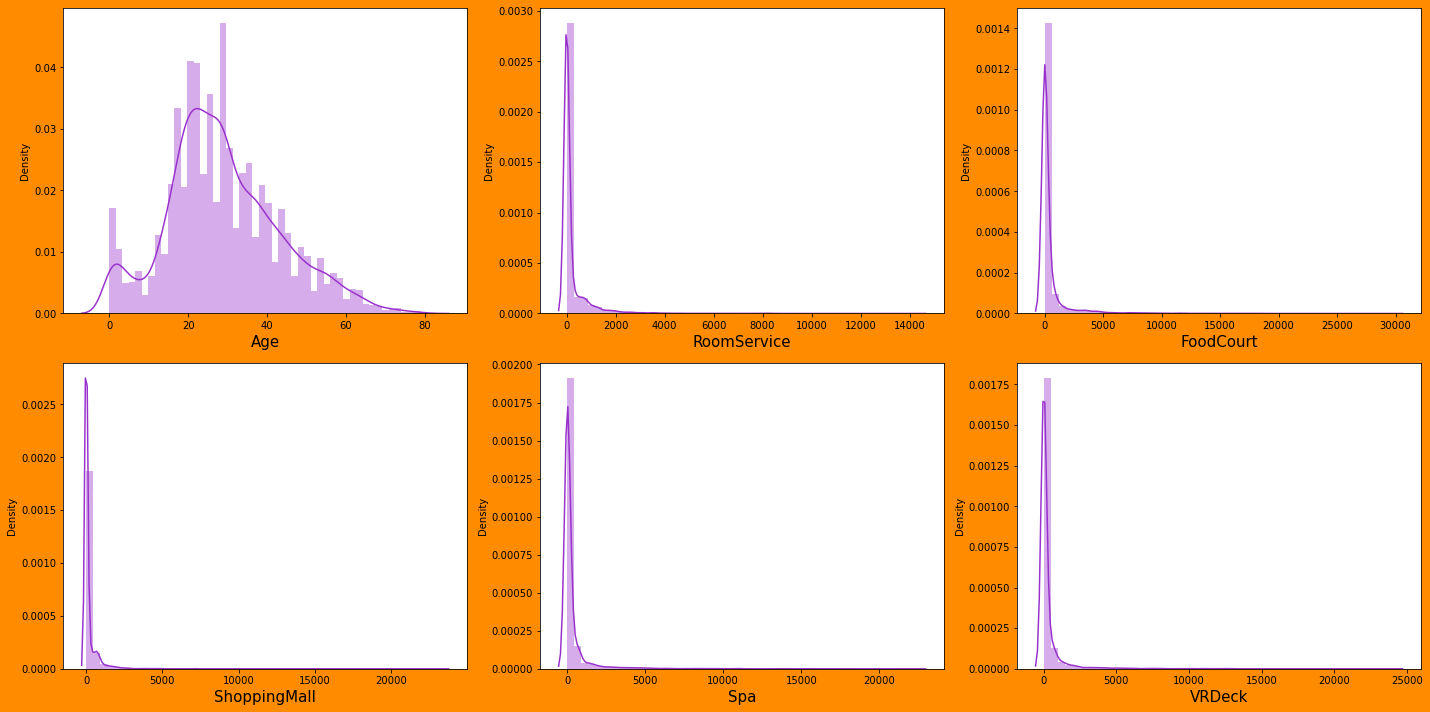

In [30]:
plt.figure(figsize=(20,10), facecolor='darkorange')
plotnumber =1

for column in df_cont:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df_cont[column], color='darkorchid')
        plt.xlabel(column, fontsize = 15)
        
    plotnumber+=1
plt.tight_layout()
plt.show()

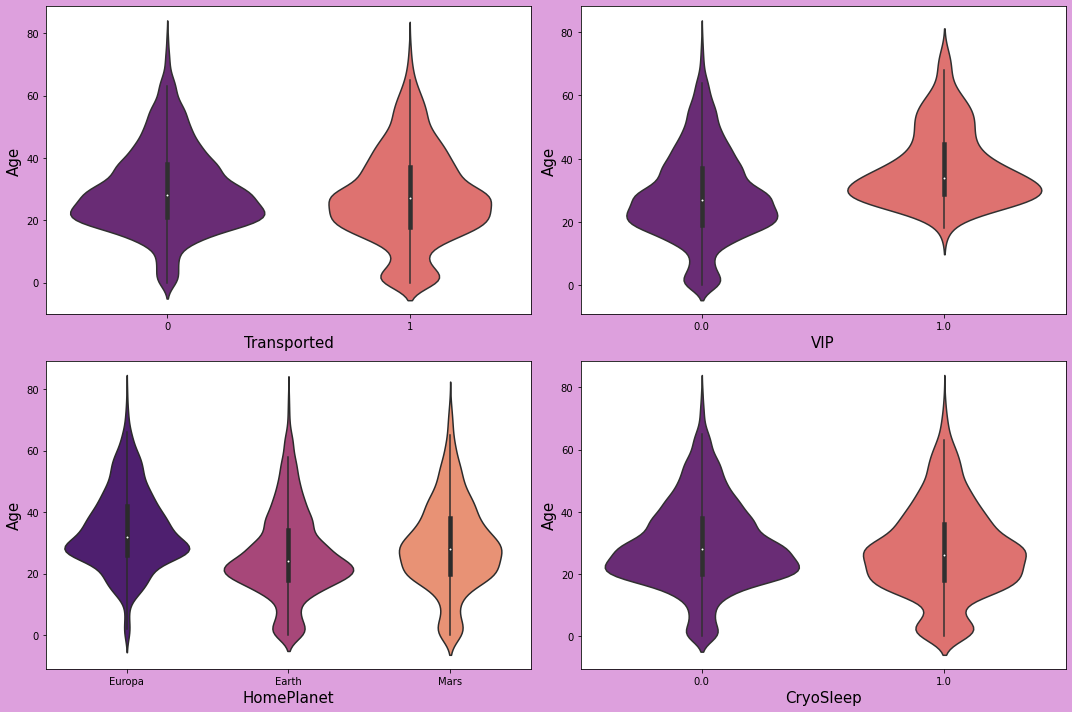

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10), facecolor='plum')

variables = [('Transported', axs[0, 0]), ('VIP', axs[0, 1]), ('HomePlanet', axs[1, 0]), ('CryoSleep', axs[1, 1])]

for variable, ax in variables:
    sns.violinplot(data=df, y='Age', x=variable, palette="magma", ax=ax)
    ax.set_ylabel('Age', fontsize=15)
    ax.set_xlabel(variable, fontsize=15)

plt.tight_layout()


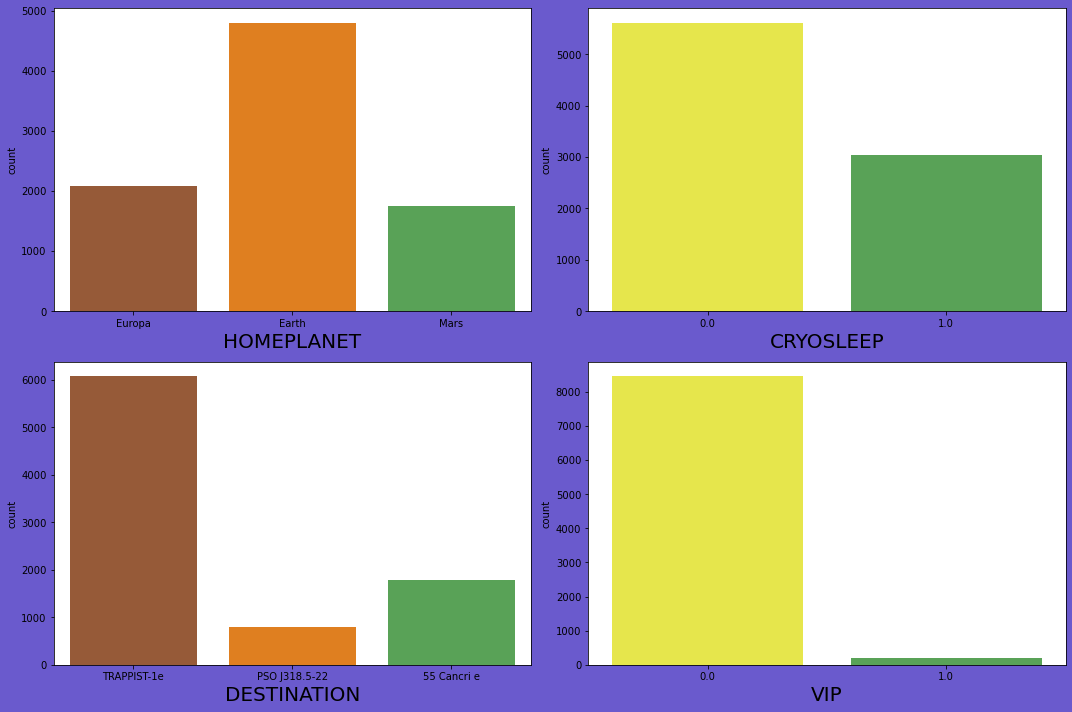

In [32]:
dfca = df[['HomePlanet','CryoSleep','Destination','VIP']]

plt.figure(figsize=(15,10), facecolor='slateblue')
plotnumber = 1

for columns in dfca:
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.countplot(x=dfca[columns], data= df, palette='Set1_r' )
        plt.xlabel(columns.upper(), fontsize = 20)
    plotnumber+=1 
plt.tight_layout()

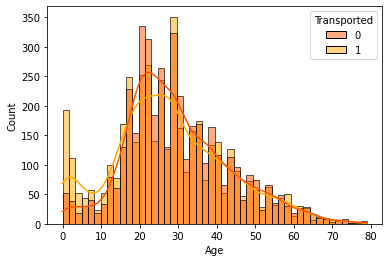

In [33]:
sns.histplot(x=df.Age, data=df, hue= df.Transported, kde=True, palette='autumn');

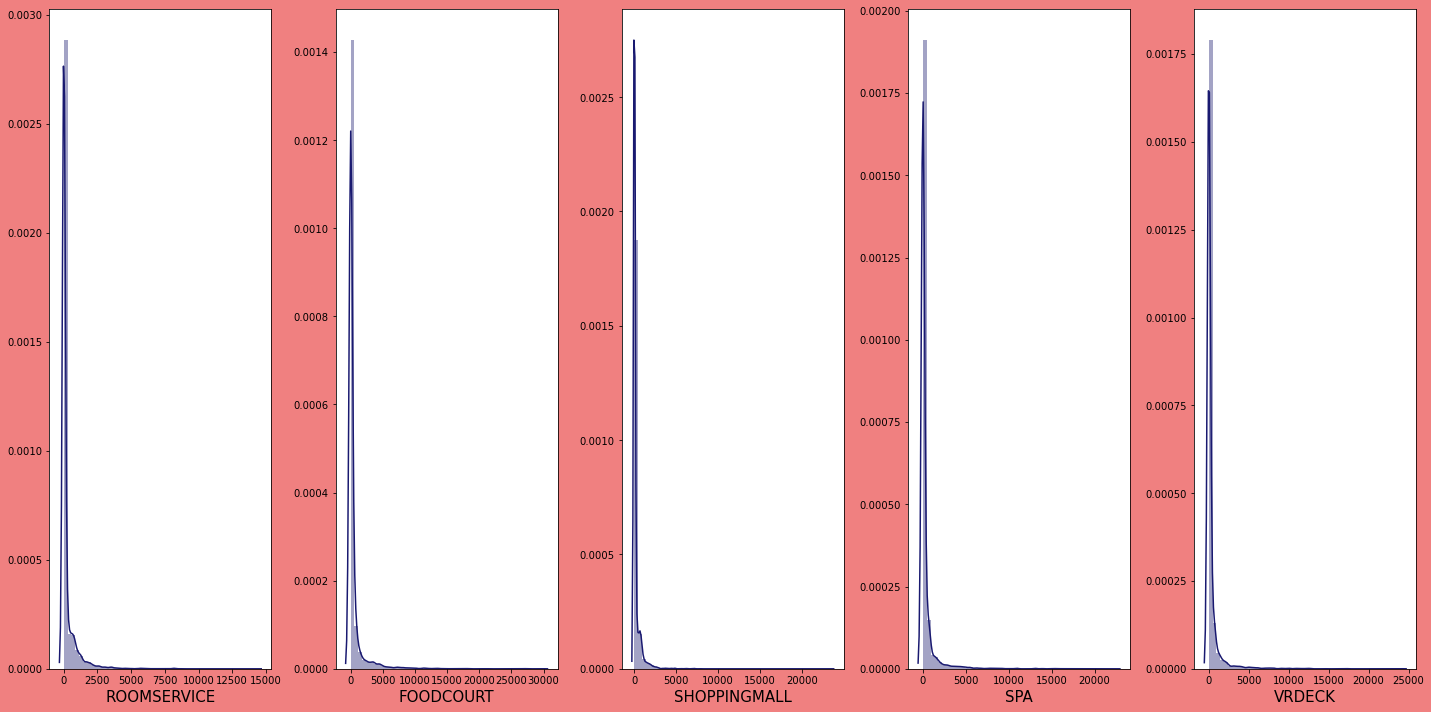

In [34]:
df_cont1= df_cont[['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
plt.figure(figsize=(20,10), facecolor='lightcoral')
plotnumber = 1

for columns in df_cont1:
    if plotnumber <=5:
        ax=plt.subplot(1,5,plotnumber)
        sns.distplot(x= df_cont1[columns], norm_hist=True, color='midnightblue')
        plt.xlabel(columns.upper(), fontsize = 15)
        plt.ylabel('')
    plotnumber+=1   
plt.tight_layout()

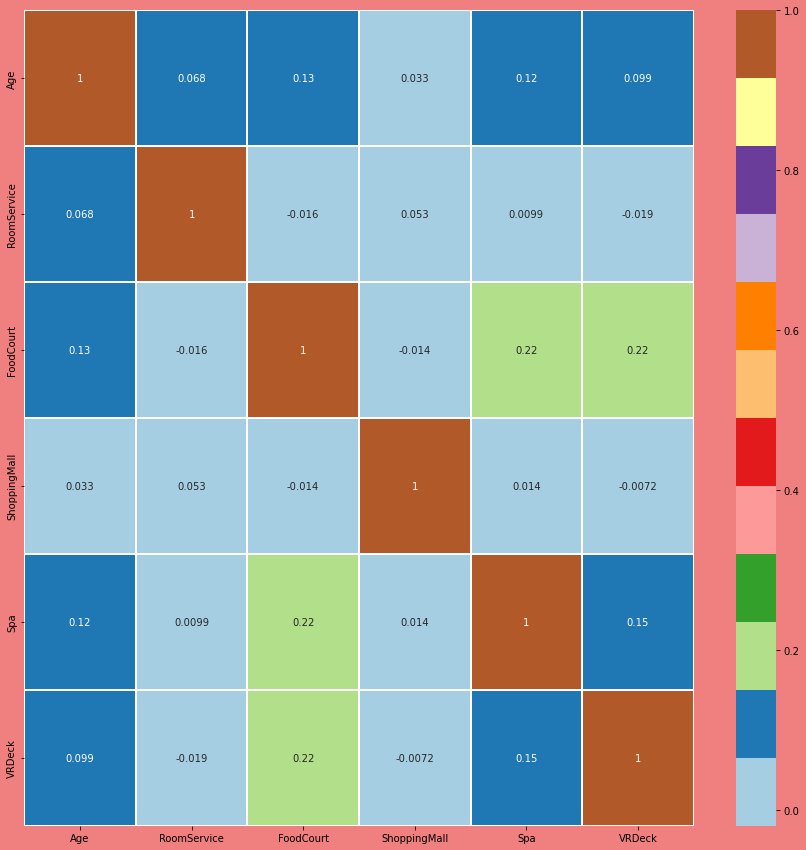

In [35]:
plt.figure(figsize=(15,15), facecolor='lightcoral')
sns.heatmap(df_cont.corr(), annot=True, cmap='Paired',linewidths=0.05);

Text(726.2499999999999, 0.5, 'Variables')

<Figure size 864x720 with 0 Axes>

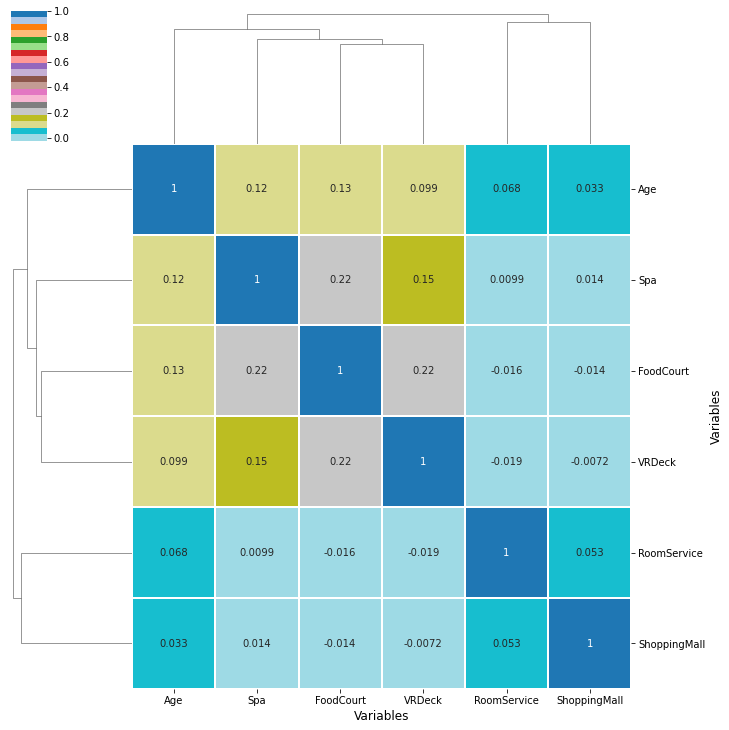

In [36]:
# Create a clustered heatmap of the pairwise correlation between columns in the df_cont dataframe
plt.figure(figsize=(12, 10))
corr = df_cont.corr()
clustermap = sns.clustermap(corr, annot=True, cmap='tab20_r', linewidths=0.05)
# Set labels for the axes and colorbar
clustermap.ax_heatmap.set_xlabel('Variables', fontsize=12)
clustermap.ax_heatmap.set_ylabel('Variables', fontsize=12)


In [37]:
df1=df.copy()
dfd=pd.get_dummies(df1)

In [38]:
# Separating feature and output/result
X = dfd.drop(columns=['Transported'])
y = dfd.Transported

# Splting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

# Initializing Logistic regression 
lgr = LogisticRegression()

# Fitting Logistic modle
lgr.fit(X_train, y_train)

# Predict the model
y_pred = lgr.predict(X_test)

# Model Report/results
print('Accuracy Score', (accuracy_score(y_pred,y_test))*100)
print('\n Confusion Matrix \n', confusion_matrix(y_pred, y_test))
print('\n Classfication Report \n', classification_report(y_pred,y_test))

Accuracy Score 79.33425797503467

 Confusion Matrix 
 [[832 229]
 [218 884]]

 Classfication Report 
               precision    recall  f1-score   support

           0       0.79      0.78      0.79      1061
           1       0.79      0.80      0.80      1102

    accuracy                           0.79      2163
   macro avg       0.79      0.79      0.79      2163
weighted avg       0.79      0.79      0.79      2163



In [39]:
# Spliting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=250)

# Initializing Decision Tree
Class_tree= DecisionTreeClassifier(criterion= 'gini', max_depth= 3)

# Applying Decision Tree model to data
Class_tree.fit(X_train,y_train)

# Predict the model
y_pred = Class_tree.predict(X_test)

# Model Report/results
print('Accuracy Score', (accuracy_score(y_pred,y_test))*100)
print('\n Confusion Matrix \n', confusion_matrix(y_pred, y_test))
print('\n Classfication Report \n', classification_report(y_pred,y_test))

Accuracy Score 72.58437355524734

 Confusion Matrix 
 [[930 441]
 [152 640]]

 Classfication Report 
               precision    recall  f1-score   support

           0       0.86      0.68      0.76      1371
           1       0.59      0.81      0.68       792

    accuracy                           0.73      2163
   macro avg       0.73      0.74      0.72      2163
weighted avg       0.76      0.73      0.73      2163



In [49]:
# parameter's
param =  {
    'criterion': ['gini','entropy',"log_loss"],
    'max_depth' : range(2,10),
    'min_samples_leaf' : range(2,10),
    'splitter' : ['best','random']
}

# Initializing Grid Search CV
grid_search = GridSearchCV(estimator=Class_tree,
                           param_grid=param, cv=5, n_jobs=-1)

#Applying Grid Search CV
grid_search.fit(X_train, y_train)


#Result
print('Grid Search Best Parameter',grid_search.best_params_)
print('Grid Search Best Score',grid_search.best_score_)

Grid Search Best Parameter {'criterion': 'log_loss', 'max_depth': 8, 'min_samples_leaf': 8, 'splitter': 'best'}
Grid Search Best Score 0.7847666714582544


In [55]:
# Initializing Decision Tree
Class_tree = DecisionTreeClassifier(criterion= 'log_loss', max_depth= 8, 
                                   min_samples_leaf= 14, splitter='random')

# Applying Decision Tree model to data
Class_tree.fit(X_train,y_train)

# Predict the model
y_pred = Class_tree.predict(X_test)

# Model Report/results
print('Accuracy Score', (accuracy_score(y_pred,y_test))*100)
print('\n Confusion Matrix \n', confusion_matrix(y_pred, y_test))
print('\n Classfication Report \n', classification_report(y_pred,y_test))

Accuracy Score 78.87193712436431

 Confusion Matrix 
 [[795 170]
 [287 911]]

 Classfication Report 
               precision    recall  f1-score   support

           0       0.73      0.82      0.78       965
           1       0.84      0.76      0.80      1198

    accuracy                           0.79      2163
   macro avg       0.79      0.79      0.79      2163
weighted avg       0.79      0.79      0.79      2163



In [53]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [56]:
# cleaning the data
df_test.drop(['Cabin','Name'], axis=1, inplace=True)

df_test[categorical_cols] = df_test[categorical_cols].fillna(df_test[categorical_cols].mode().iloc[0])
df_test[numeric_cols] = df_test[numeric_cols].fillna(df_test[numeric_cols].mean())

df_test.replace({True:1, False:0}, inplace=True)


df_test1=df_test.copy()
df_test1.drop(['PassengerId'], axis=1, inplace=True)
df_test1=pd.get_dummies(df_test1)

In [57]:
# Predict the model
y_predf = Class_tree.predict(df_test1)


In [58]:
df_test2=df_test.copy()
df_test2['Transported']=y_predf

In [59]:
df_test2.head(2)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0013_01,Earth,1,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,1
1,0018_01,Earth,0,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0,0


In [60]:
df_sample=df_test2[['PassengerId','Transported']]
df_sample.replace({1:True, 0:False}, inplace=True)
df_sample.head(5)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [61]:
# saving the DataFrame as a CSV file
submissiondata = df_sample.to_csv('Submission.csv', index = False)
